# 結果

- 各階にいるひとの数を説明変数にいれることで精度は向上する
- 用いたモデルは線形回帰、random forest、lightgbmで３つの手法全てで精度向上が見られた(MAEで評価したが、劇的というわけではない)
- lightgbmのfeature importanceを見ると、精度向上に聞いているのは、 'previous1','S1', 'S0','time','dtime'の順番
- previous2以降はほとんど効いていないように見える
- チューニングは一切していない

In [42]:
import pandas as pd

df = pd.DataFrame(columns=['linear regression','random forest','lightgbm'])
df.loc['state_is_0'] = [15.2,10.6,10.1]
df.loc['state_is_1'] = [14.8,10.0,9.5]
df.head()

,linear regression,random forest,lightgbm
state_is_0,15.2,10.6,10.1
state_is_1,14.8,10.0,9.5


# 状態を使う場合

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_csv('df_all_.csv')
df = df[df['previous10']>=0]

train = df[df['day']<80]
test = df[df['day']>=80]
train_X = train.drop(['day','in','out','passenger','passenger_pt'],axis=1)
train_Y = train.loc[:,'passenger']
test_X = test.drop(['day','in','out','passenger','passenger_pt'],axis=1)
test_Y = test.loc[:,'passenger']



mae=14.880656495922674


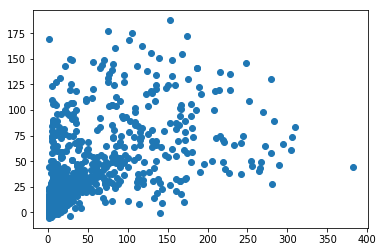

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_X,train_Y)
predict = lr.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
plt.scatter(test_Y,predict)
plt.show()

mae=9.972737471952126
Index(['time', 'S0', 'S1', 'dtime', 'previous1', 'previous2', 'previous3',
       'previous4', 'previous5', 'previous6', 'previous7', 'previous8',
       'previous9', 'previous10'],
      dtype='object')
[0.0882325  0.09266321 0.14467192 0.0685791  0.41374538 0.04494193
 0.0363891  0.01997472 0.01775539 0.01705971 0.01729005 0.01371087
 0.0112414  0.01374475]


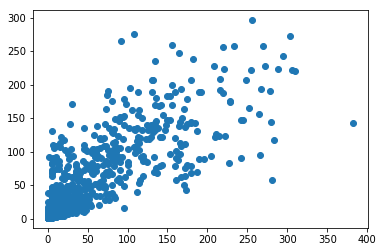

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(train_X,train_Y)
predict = rf.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
print(train_X.columns)
print(rf.feature_importances_)
plt.scatter(test_Y,predict)
plt.show()


mae=9.543184982777696
Index(['time', 'S0', 'S1', 'dtime', 'previous1', 'previous2', 'previous3',
       'previous4', 'previous5', 'previous6', 'previous7', 'previous8',
       'previous9', 'previous10'],
      dtype='object')
[0.0882325  0.09266321 0.14467192 0.0685791  0.41374538 0.04494193
 0.0363891  0.01997472 0.01775539 0.01705971 0.01729005 0.01371087
 0.0112414  0.01374475]


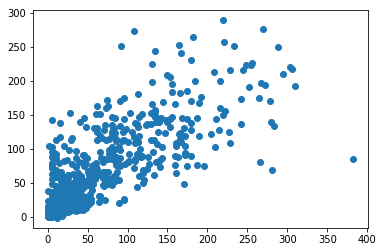

In [35]:
import lightgbm as lgb

lgb_train = lgb.Dataset(train_X, train_Y)
lgb_eval = lgb.Dataset(test_X, test_Y, reference=lgb_train)

params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}

lg = lightgbm.train(params,lgb_train)
predict = lg.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
print(train_X.columns)
print(rf.feature_importances_)
plt.scatter(test_Y,predict)
plt.show()

# 状態を使わない場合

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('df_all_.csv')
df = df[df['previous10']>=0]

train = df[df['day']<80]
test = df[df['day']>=80]
train_X = train.drop(['day','in','out','passenger','passenger_pt','S0','S1'],axis=1)
train_Y = train.loc[:,'passenger']
test_X = test.drop(['day','in','out','passenger','passenger_pt','S0','S1'],axis=1)
test_Y = test.loc[:,'passenger']

mae=15.247376963437162


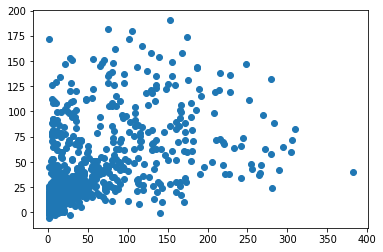

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_X,train_Y)
predict = lr.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
plt.scatter(test_Y,predict)
plt.show()

mae=10.646896035901259
Index(['time', 'dtime', 'previous1', 'previous2', 'previous3', 'previous4',
       'previous5', 'previous6', 'previous7', 'previous8', 'previous9',
       'previous10'],
      dtype='object')
[0.09343029 0.07120871 0.44843751 0.06859926 0.07029153 0.03349653
 0.05806086 0.06751355 0.02567247 0.02684135 0.01875583 0.01769211]


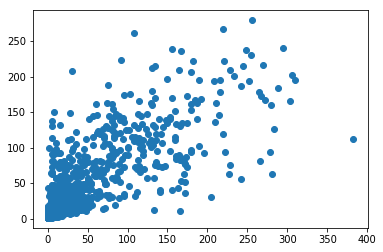

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(train_X,train_Y)
predict = rf.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
print(train_X.columns)
print(rf.feature_importances_)
plt.scatter(test_Y,predict)
plt.show()


mae=10.139381859924619
Index(['time', 'dtime', 'previous1', 'previous2', 'previous3', 'previous4',
       'previous5', 'previous6', 'previous7', 'previous8', 'previous9',
       'previous10'],
      dtype='object')
[0.09343029 0.07120871 0.44843751 0.06859926 0.07029153 0.03349653
 0.05806086 0.06751355 0.02567247 0.02684135 0.01875583 0.01769211]


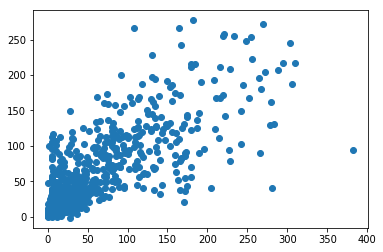

In [40]:
import lightgbm as lgb

lgb_train = lgb.Dataset(train_X, train_Y)
lgb_eval = lgb.Dataset(test_X, test_Y, reference=lgb_train)

params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : {'l2'},
        'num_leaves' : 31,
        'learning_rate' : 0.1,
        'feature_fraction' : 0.9,
        'bagging_fraction' : 0.8,
        'bagging_freq': 5,
        'verbose' : 0
}

lg = lightgbm.train(params,lgb_train)
predict = lg.predict(test_X)
print('mae='+str(np.mean(np.abs(test_Y-predict))))
print(train_X.columns)
print(rf.feature_importances_)
plt.scatter(test_Y,predict)
plt.show()